In [38]:
using DrWatson
@quickactivate "sst-mot-analysis"

import DrWatson: datadir, srcdir
import DrWatson: @quickactivate
using NaNStatistics
include(srcdir("compare_random_samples.jl"))

using GH19, TMI, PythonCall, Revise, PythonPlot

 takes about 10 minutes
Theta_OPT-0015.nc already downloaded; use `force=true` to re-download
Theta_anom_OPT-0015.nc already downloaded; use `force=true` to re-download


In [39]:
mean(x::BoundaryCondition, γ) = sum(vec(x) .* vec(cellarea(γ))) / sum(vec(cellarea(γ)))

mean (generic function with 1 method)

In [72]:
function get_MOT_and_SST(TMI_version::String)
    A, Alu, γ, TMIfile, L, B = config(TMI_version); 
    TMIfile = TMI.pkgdatadir("TMI_"*TMI_version*".nc")
    θ̄ = readfield(TMIfile, "θ", γ); #true mean
    θ̄_SST = getsurfaceboundary(θ̄);
    # θ̄ = steadyinversion(Alu, θ̄_SST, γ)
    return TMI.mean(θ̄), mean(θ̄_SST, γ)
end

function get_MOT_and_SST(θ̄::Field, γ::Grid)
    θ̄_SST = getsurfaceboundary(θ̄);
    return TMI.mean(θ̄), mean(θ̄_SST, γ)
end

get_MOT_and_SST (generic function with 2 methods)

In [73]:
filter(v->occursin("LGM",v), versionlist())

("LGM_90x45x33_G14", "LGM_90x45x33_G14A", "LGM_90x45x33_GPLS1", "LGM_90x45x33_GPLS2", "LGM_90x45x33_OG18")

In [74]:
glacial_versions = filter(v->occursin("LGM",v), versionlist())
glacial_versions = glacial_versions[[1, 3, 4, 5]]

("LGM_90x45x33_G14", "LGM_90x45x33_GPLS1", "LGM_90x45x33_GPLS2", "LGM_90x45x33_OG18")

In [75]:
glacial_temps = Dict(k => (get_MOT_and_SST(k)) for k in glacial_versions)

Form water-mass matrix A
  0.015082 seconds (1.99 k allocations: 26.437 MiB)
LU factorization of A
  0.401814 seconds (88 allocations: 305.217 MiB, 13.37% gc time)
circulation matrix L=
  0.002220 seconds (333 allocations: 26.828 KiB)
Boundary matrix B=
  0.001736 seconds (332 allocations: 26.805 KiB)
Form water-mass matrix A
  0.011406 seconds (1.99 k allocations: 26.437 MiB)
LU factorization of A
  0.327078 seconds (87 allocations: 305.263 MiB)
circulation matrix L=
  0.002025 seconds (333 allocations: 26.828 KiB)
Boundary matrix B=
  0.001076 seconds (332 allocations: 26.805 KiB)
Form water-mass matrix A
  0.013347 seconds (1.99 k allocations: 26.437 MiB)
LU factorization of A
  0.340028 seconds (87 allocations: 305.263 MiB)
circulation matrix L=
  0.001923 seconds (333 allocations: 26.828 KiB)
Boundary matrix B=
  0.001122 seconds (332 allocations: 26.805 KiB)
Form water-mass matrix A
  0.012642 seconds (1.99 k allocations: 26.437 MiB)
LU factorization of A
  0.383819 seconds (99 a

Dict{String, Tuple{Float64, Float64}} with 4 entries:
  "LGM_90x45x33_OG18"  => (3.00805, 13.5865)
  "LGM_90x45x33_GPLS2" => (1.46506, 10.656)
  "LGM_90x45x33_GPLS1" => (3.24336, 12.1271)
  "LGM_90x45x33_G14"   => (0.929498, 11.5837)

In [76]:
###### LOAD PREINDUSTRIAL ###########
TMI_version = GH19.TMIversion();
A, Alu, γ_mod, TMIfile, L, B = config(TMI_version); 
TMIfile = TMI.pkgdatadir("TMI_"*TMI_version*".nc")

θ̄GH19 = load_GH19_equillibrium()

θ̄_mod_MOT, θ̄_mod_SST_fine = get_MOT_and_SST(θ̄GH19, γ_mod);

Form water-mass matrix A
  0.041394 seconds (5.23 k allocations: 118.943 MiB)
LU factorization of A
  4.614394 seconds (91 allocations: 2.868 GiB, 0.19% gc time)
circulation matrix L=
  0.124797 seconds (8.14 M allocations: 224.520 MiB)
Boundary matrix B=
  0.012429 seconds (6.14 k allocations: 7.270 MiB)
Form water-mass matrix A
  0.028845 seconds (5.23 k allocations: 118.943 MiB)
LU factorization of A
  4.884960 seconds (89 allocations: 2.868 GiB, 0.24% gc time)
circulation matrix L=
  0.124028 seconds (8.14 M allocations: 224.520 MiB)
Boundary matrix B=
  0.010350 seconds (6.14 k allocations: 7.270 MiB)


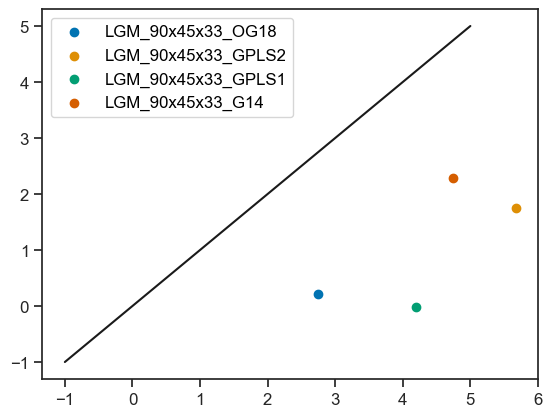

Python: <matplotlib.legend.Legend object at 0x167672de0>

In [71]:
glacial_ΔMOT = Dict(k => θ̄_mod_MOT -  glacial_temps[k][1] for k in keys(glacial_temps))
glacial_ΔSST = Dict(k => θ̄_mod_SST_fine -  glacial_temps[k][2] for k in keys(glacial_temps))

fig, ax = subplots()
ax.plot(-1:5, -1:5, c = "k")
for k in keys(glacial_ΔMOT)
    ax.scatter(glacial_ΔSST[k], glacial_ΔMOT[k], label = k)
end
ax.legend()